## Day 05:

In [1]:
import pandas as pd
import numpy as np

In [4]:
climate_df=pd.read_csv("mumbai_climate_cleaned.csv")

In [5]:
climate_df['Year'] = climate_df['Date'].dt.year
climate_df['Month'] = climate_df['Date'].dt.month
climate_df['Day'] = climate_df['Date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

In [6]:
climate_df['Date'] = pd.to_datetime(
    climate_df['Date'],
    errors='coerce',
    dayfirst=True
)

In [7]:
climate_df['Date'].dtype

dtype('<M8[ns]')

In [8]:
climate_df['Year'] = climate_df['Date'].dt.year
climate_df['Month'] = climate_df['Date'].dt.month
climate_df['Day'] = climate_df['Date'].dt.day

In [ ]:
# this breaks data into usable numeric components
# enables grouping, trends, and season logic

In [10]:
climate_df['Temp_Range'] = climate_df['Temp Max'] - climate_df['Temp Min']

In [11]:
climate_df['Rainy_Day'] = climate_df['Rain'].apply(
    lambda x: 1 if pd.notna(x) and x > 0 else 0
)

In [12]:
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

climate_df['Season'] = climate_df['Month'].apply(assign_season)

In [ ]:
# seasons explain rainfall 
# adds real-world context
# makes analysis interpretable

In [13]:
climate_df.groupby('Season')[['Rain', 'Temp Max', 'Temp Min']].mean()

,Rain,Temp Max,Temp Min
Season,,,
Monsoon,0.996112,30.314615,23.753182
Post-Monsoon,0.066629,32.731042,20.226524
Summer,0.011751,35.153139,22.114683
Winter,0.168037,30.846962,15.647134


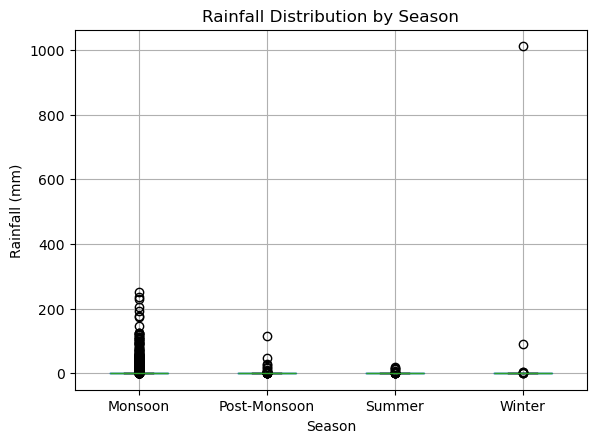

In [14]:
import matplotlib.pyplot as plt

climate_df.boxplot(column='Rain', by='Season')
plt.title('Rainfall Distribution by Season')
plt.suptitle('')
plt.xlabel('Season')
plt.ylabel('Rainfall (mm)')
plt.show()

**Monsoon → highest rainfall**

**Summer → highest temperature**

**Winter → lowest temp range**

In [16]:
climate_df.shape

(26806, 10)

In [17]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26806 entries, 0 to 26805
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        26803 non-null  datetime64[ns]
 1   Rain        26806 non-null  float64       
 2   Temp Max    26748 non-null  float64       
 3   Temp Min    26746 non-null  float64       
 4   Year        26803 non-null  float64       
 5   Month       26803 non-null  float64       
 6   Day         26803 non-null  float64       
 7   Temp_Range  26746 non-null  float64       
 8   Rainy_Day   26806 non-null  int64         
 9   Season      26806 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.0+ MB


In [ ]:
climate_df.to_csv("mumbai_climate_day05_features.csv", index=False)